In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix
from sklearn.preprocessing import StandardScaler

## Loading the Dataset

In [2]:
df=pd.read_csv("D:/greatlakes/datasets/IBM_HR_ATTRITION/IBM-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

## EDA

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [7]:
df._get_numeric_data().columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

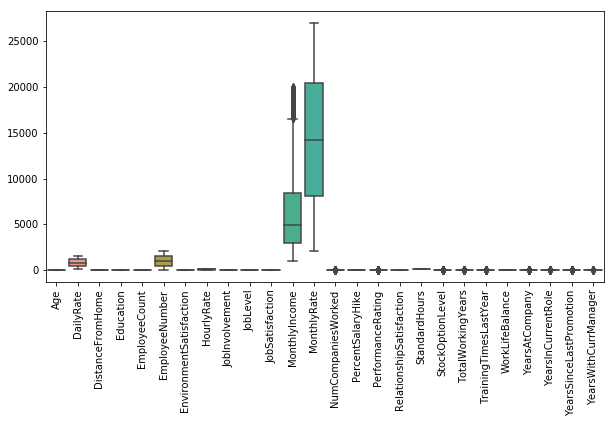

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)

We can find some outliers in the monthly income feature

In [11]:
#checking for any other type of Na values in the data frame
count=0
for i in df:
    if(i=='NaN'):
        count+=1
print(count)

0


After removing the outliers in monthly income feature

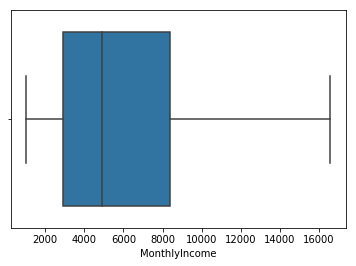

In [15]:
sns.boxplot(x='MonthlyIncome',data=df)

Capping the outliers method

In [13]:
iqr=df['MonthlyIncome'].quantile(.75)-df['MonthlyIncome'].quantile(.25)
up=df['MonthlyIncome'].quantile(.75)+(1.5*iqr)
down=df['MonthlyIncome'].quantile(.25)-(1.5*iqr)

In [14]:
for i in df['MonthlyIncome']:
    if(i>up):
        df['MonthlyIncome']=df['MonthlyIncome'].replace(to_replace=i, value=up)

### Label Encoding

In [16]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [17]:
df['Attrition']=df.Attrition.map({'Yes':1,'No':0})

In [18]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [19]:
df.BusinessTravel=df.BusinessTravel.map({'Travel_Rarely':1,'Travel_Frequently':2,'Non-Travel':3})

In [20]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [21]:
df.Department=df.Department.map({'Research & Development':1,'Sales':2,'Human Resources':3})

In [22]:
from sklearn import preprocessing

In [23]:
le=preprocessing.LabelEncoder()
df['EducationField']=le.fit_transform(df['EducationField'])

In [24]:
df['Gender']=le.fit_transform(df['Gender'])

In [25]:
df['JobRole']=le.fit_transform(df['JobRole'])

In [26]:
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [27]:
df['Over18']=df.Over18.map({'Y':1})

In [28]:
df['OverTime']=df.OverTime.map({'Yes':1,'No':0})

In [29]:
df['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

### Scaling only the Numerical data in the data frame

In [45]:
df5=df.copy()

In [46]:
df5=df5.drop(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],1)

In [47]:
df5.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [30]:
colnames=df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [32]:
df1=df.copy()

In [34]:
df1=df1.drop(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],1)

In [35]:
df1=np.array(df1)

In [38]:
df1

array([[1, 1, 2, ..., 2, 1, 1],
       [0, 2, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 2, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [0, 2, 2, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0]], dtype=int64)

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
colnames=sc.fit_transform(colnames)

In [42]:
z=np.hstack((df1,colnames))

In [49]:
df2=pd.DataFrame(z,columns=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime','Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [55]:
cat=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

In [59]:
for i in cat:
    df2[i]=df2[i].astype('category')

Successfully scaled all the numerical data using standard scaler and stored all the independent variables into a dataframe df2

### Splitting the data

In [62]:
x=df2.drop('Attrition',1)
y=df2['Attrition']

In [67]:
x1=np.array(x)
y1=np.array(y)

### Performing Train test split

In [118]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3,random_state=0)

### Model Instantiation

In [78]:
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [79]:
dt=DecisionTreeClassifier()
lr=LogisticRegression()
rf=RandomForestClassifier()

In [85]:
from sklearn import metrics

### Perfoming GridsearchCV and Model training

In [92]:
from sklearn.model_selection import GridSearchCV

In [102]:
params={'max_depth':np.arange(1,60),'criterion':['entropy','gini']}
gs=GridSearchCV(dt,params,cv=3,scoring='recall')
gs.fit(x1,y1)
gs.best_params_

{'criterion': 'gini', 'max_depth': 28}

In [144]:
# Random Forest model
rf.fit(xtrain, ytrain)

y_random_sup = rf.predict(xtest) 
y_random_sup_met=metrics.accuracy_score(ytest,y_random_sup)
random_conf_sup=metrics.confusion_matrix(ytest,y_random_sup)
fpr,tpr,_=roc_curve(ytest,y_random_sup)
random_auc_sup=(auc(fpr,tpr))
print("Accuracy for RandomForest Supervised:\n",y_random_sup_met)
print("AUC for RandomForest Supervised",random_auc_sup)
random_conf_sup

Accuracy for RandomForest Supervised:
 0.8616780045351474
AUC for RandomForest Supervised 0.5932614555256064


array([[366,   5],
       [ 56,  14]], dtype=int64)

In [146]:
# Logistic Regression model
lr.fit(xtrain, ytrain)

log_model_scaled = lr.predict(xtest) 
y_log_model_scaled_met=metrics.accuracy_score(ytest,log_model_scaled)
log_conf_sup=metrics.confusion_matrix(ytest,log_model_scaled)
fpr,tpr,_=roc_curve(ytest,log_model_scaled)
log_auc_sup=(auc(fpr,tpr))
print("Accuracy for Logistic Regression: ",y_log_model_scaled_met)
print("AUC for Logistic Regression Supervised: ",log_auc_sup)
log_conf_sup

Accuracy for Logistic Regression:  0.8798185941043084
AUC for Logistic Regression Supervised:  0.6677897574123989


array([[363,   8],
       [ 45,  25]], dtype=int64)

In [147]:
# Decision Tree model
 
dt.fit(xtrain, ytrain)

tree_model_scaled = dt.predict(xtest) 
tree_model_scaled_met=metrics.accuracy_score(ytest,tree_model_scaled)
tree_conf_sup=metrics.confusion_matrix(ytest,tree_model_scaled)
fpr,tpr,_=roc_curve(ytest,tree_model_scaled)
tree_auc_sup=(auc(fpr,tpr))
print("Accuracy for Decision Tree: ",tree_model_scaled_met)
print("AUC for Decision Tree Supervised: ",tree_auc_sup)
tree_conf_sup

Accuracy for Decision Tree:  0.7755102040816326
AUC for Decision Tree Supervised:  0.6057951482479784


array([[317,  54],
       [ 45,  25]], dtype=int64)

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
# KNN model

KNN_model_sv = KNeighborsClassifier()  
KNN_model_sv.fit(xtrain, ytrain)

KNN_model_scaled = KNN_model_sv.predict(xtest) 
KNN_model_scaled_met=metrics.accuracy_score(ytest,KNN_model_scaled)
knn_conf_sup=metrics.confusion_matrix(ytest,KNN_model_scaled)
fpr,tpr,_=roc_curve(ytest,KNN_model_scaled)
knn_auc_sup=(auc(fpr,tpr))
print("Accuracy for KNN supervised:\n",KNN_model_scaled_met)
print("AUC for KNN Supervised: ",knn_auc_sup)
knn_conf_sup

Accuracy for KNN supervised:
 0.8571428571428571
AUC for KNN Supervised:  0.5731805929919137


array([[367,   4],
       [ 59,  11]], dtype=int64)

In [134]:
params={'n_neighbors':np.arange(1,60),'weights':['uniform','distance']}
gs=GridSearchCV(KNN_model_sv,params,cv=3,scoring='recall')
gs.fit(x1,y1)
gs.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [135]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [103]:
import warnings
warnings.filterwarnings('ignore')

In [149]:
# Naive model

Naive_model_sv = GaussianNB()  
Naive_model_sv.fit(xtrain, ytrain)

Naive_model_scaled = Naive_model_sv.predict(xtest) 
Naive_model_scaled_met=metrics.accuracy_score(ytest,Naive_model_scaled)
nb_conf_sup=metrics.confusion_matrix(ytest,Naive_model_scaled)
fpr,tpr,_=roc_curve(ytest,Naive_model_scaled)
nb_auc_sup=(auc(fpr,tpr))
print("Accuracy for NB supervised: ",Naive_model_scaled_met)
print("AUC for NB Supervised: ",nb_auc_sup)
nb_conf_sup

Accuracy for NB supervised:  0.7913832199546486
AUC for NB Supervised:  0.7369272237196764


array([[303,  68],
       [ 24,  46]], dtype=int64)

In [150]:
# SVM model

SVM_model_sv = SVC()  
SVM_model_sv.fit(xtrain, ytrain)

SVM_model_scaled = SVM_model_sv.predict(xtest) 
SVM_model_scaled_met=metrics.accuracy_score(ytest,SVM_model_scaled)
svm_conf_sup=metrics.confusion_matrix(ytest,SVM_model_scaled)
fpr,tpr,_=roc_curve(ytest,SVM_model_scaled)
svm_auc_sup=(auc(fpr,tpr))
print("Accuracy for SVM supervised: ",SVM_model_scaled_met)
print("AUC for SVM Supervised: ",svm_auc_sup)
svm_conf_sup

Accuracy for SVM supervised:  0.8480725623582767
AUC for SVM Supervised:  0.5272237196765498


array([[370,   1],
       [ 66,   4]], dtype=int64)

In [155]:
Accuracy_Scores_3=pd.DataFrame({"Accuracy_Scores_supervised":[y_random_sup_met,y_log_model_scaled_met,tree_model_scaled_met,
                                     KNN_model_scaled_met,Naive_model_scaled_met,SVM_model_scaled_met],"AUC":[random_auc_sup,log_auc_sup,tree_auc_sup,knn_auc_sup,nb_auc_sup,svm_auc_sup]},index= ["Random Forest Supervised","Logistic Regression Supervised","DT Supervised",
                                     "KNN supervised","NB supervised","SVM supervised"])

Accuracy_Scores_3.sort_values(by="Accuracy_Scores_supervised",ascending=False)

,Accuracy_Scores_supervised,AUC
Logistic Regression Supervised,0.879819,0.667790
Random Forest Supervised,0.861678,0.593261
KNN supervised,0.857143,0.573181
SVM supervised,0.848073,0.527224
NB supervised,0.791383,0.736927
DT Supervised,0.775510,0.605795


Comparing to other model Logistic Regression produce more accuracy. Eventhough the AUC of NB is high its Accuracy is less hence choose Logistic Regression

### Incresing the model accuracy

In [168]:
dt_reg=DecisionTreeClassifier(criterion='entropy',max_depth=28,random_state=0)
lr_reg=LogisticRegression(penalty='l1',random_state=0)

In [169]:
# Decision reg_tree model
 
dt_reg.fit(xtrain, ytrain)

reg_tree_model_scaled = dt_reg.predict(xtest) 
reg_tree_model_scaled_met=metrics.accuracy_score(ytest,reg_tree_model_scaled)
reg_tree_conf_sup=metrics.confusion_matrix(ytest,reg_tree_model_scaled)
fpr,tpr,_=roc_curve(ytest,reg_tree_model_scaled)
reg_tree_auc_sup=(auc(fpr,tpr))
print("Accuracy for Decision reg_tree: ",reg_tree_model_scaled_met)
print("AUC for Decision reg_tree Supervised: ",reg_tree_auc_sup)
reg_tree_conf_sup

Accuracy for Decision reg_tree:  0.8072562358276644
AUC for Decision reg_tree Supervised:  0.6014824797843665


array([[335,  36],
       [ 49,  21]], dtype=int64)

In [170]:
# reg_logistic Regression model
lr_reg.fit(xtrain, ytrain)

reg_log_model_scaled = lr_reg.predict(xtest) 
y_reg_log_model_scaled_met=metrics.accuracy_score(ytest,reg_log_model_scaled)
reg_log_conf_sup=metrics.confusion_matrix(ytest,reg_log_model_scaled)
fpr,tpr,_=roc_curve(ytest,reg_log_model_scaled)
reg_log_auc_sup=(auc(fpr,tpr))
print("Accuracy for reg_logistic Regression: ",y_reg_log_model_scaled_met)
print("AUC for reg_logistic Regression Supervised: ",reg_log_auc_sup)
reg_log_conf_sup

Accuracy for reg_logistic Regression:  0.8820861678004536
AUC for reg_logistic Regression Supervised:  0.6691374663072777


array([[364,   7],
       [ 45,  25]], dtype=int64)

In [171]:
#we cannot find much difference between the non regularised models and regularised models

In [180]:
bag_lr=BaggingClassifier(base_estimator=lr,n_estimators=30,random_state=30)
bag_lr.fit(xtrain, ytrain)

bag_log_model_scaled = bag_lr.predict(xtest) 
bag_log_model_scaled_met=metrics.accuracy_score(ytest,bag_log_model_scaled)
bag_log_conf_sup=metrics.confusion_matrix(ytest,bag_log_model_scaled)
fpr,tpr,_=roc_curve(ytest,log_model_scaled)
bag_log_auc_sup=(auc(fpr,tpr))
print("Accuracy for Bagged Logistic Regression: ",bag_log_model_scaled_met)
print("AUC for Bagged logistic Regression Supervised: ",bag_log_auc_sup)
bag_log_conf_sup

Accuracy for Bagged Logistic Regression:  0.8820861678004536
AUC for Bagged logistic Regression Supervised:  0.6677897574123989


array([[363,   8],
       [ 44,  26]], dtype=int64)

In [183]:
models=[]
models.append(('DecisionTree',dt)) #fully grown dt
models.append(('DT_Regularized',dt_reg))
models.append(('RandomForest',rf))
models.append(('LR',lr))
models.append(('Bagged_lr',bag_lr))
models.append(('SVM',SVM_model_sv))
models.append(('KNN',KNN_model_sv))
models.append(('NB',Naive_model_sv))

In [184]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=5,random_state=2)
    cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1))
    print(msg)

DecisionTree: 0.389087 (0.002173)
DT_Regularized: 0.347376 (0.000984)
RandomForest: 0.145208 (0.002438)
LR: 0.373584 (0.006603)
Bagged_lr: 0.378235 (0.006423)
SVM: 0.096999 (0.000154)
KNN: 0.107827 (0.000576)
NB: 0.602062 (0.001475)


SVM has less variance error, but in terms of accuracy wise svm not performs well

In [187]:
from sklearn.ensemble import GradientBoostingClassifier

In [190]:
gbs=GradientBoostingClassifier()
gbs.fit(xtrain, ytrain)

gbs_model_scaled = gbs.predict(xtest) 
gbs_model_scaled_met=metrics.accuracy_score(ytest,gbs_model_scaled)
gbs_conf_sup=metrics.confusion_matrix(ytest,gbs_model_scaled)
fpr,tpr,_=roc_curve(ytest,log_model_scaled)
gbs_auc_sup=(auc(fpr,tpr))
print("Accuracy for Gradient Boost Classifier Supervised: ",gbs_model_scaled_met)
print("AUC for Gradient Boost Classifier Supervised: ",gbs_auc_sup)
gbs_conf_sup

Accuracy for Gradient Boost Classifier Supervised:  0.8752834467120182
AUC for Gradient Boost Classifier Supervised:  0.6677897574123989


array([[363,   8],
       [ 47,  23]], dtype=int64)

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

# Unsupervised Learning

In [206]:
df3.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age,DailyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,target
0,1,2,1,0,7,2,1,1,0.446350,0.742527,...,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,1
1,2,1,1,1,6,1,1,0,1.322365,-1.297775,...,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,1
2,1,1,4,1,2,2,1,1,0.008343,1.414363,...,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0
3,2,1,1,0,6,1,1,1,-0.429664,1.461466,...,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,1
4,1,1,3,1,2,1,1,0,-1.086676,-0.524295,...,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0


In [195]:
df3=df2.copy()

In [196]:
df3=df3.drop(['Attrition'],1)

In [199]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [200]:
x_km=df3
y_check=df2['Attrition']

In [202]:
kmeans=KMeans(n_clusters=2).fit(x_km)
pred_target_km= list(kmeans.labels_)
kmean_acc = metrics.accuracy_score(y_check,pred_target_km)

#________________________________________________________________________________

agg_cluster = AgglomerativeClustering(n_clusters = 2, linkage="ward")
pred_target_agg = list(agg_cluster.fit_predict(x_km))
agg_acc = metrics.accuracy_score(y_check,pred_target_agg)

compare = pd.DataFrame({"Accuracy_Scores":[kmean_acc,agg_acc]},index=["Kmean_cluster","Agglomerative_cluster"])
compare.sort_values(by="Accuracy_Scores",ascending=False)

,Accuracy_Scores
Agglomerative_cluster,0.489116
Kmean_cluster,0.463946


In [204]:
df3['target']=pred_target_agg

In [203]:
#agglomerative clustering performs good relative to Kmeans

In [207]:
y_cl=df3['target']

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x_km,y_cl,test_size=0.3, random_state=0)  

In [239]:
# Random Forest model
random_us = RandomForestClassifier()  
random_us.fit(x_train, y_train)

random_us_pred = random_us.predict(x_test) 
random_us_acc=metrics.accuracy_score(y_test,random_us_pred)
random_conf_us=metrics.confusion_matrix(y_test,y_random_sup)
fpr,tpr,_=roc_curve(y_test,y_random_sup)
random_auc_us=(auc(fpr,tpr))

print("Accuracy for Random Forest Unsupervised: ",random_us_acc)
print("AUC for RandomForest Unsupervised",random_auc_us)
random_conf_us

Accuracy for Random Forest Unsupervised:  0.9931972789115646
AUC for RandomForest Unsupervised 0.5104629629629629


array([[209,   7],
       [213,  12]], dtype=int64)

In [241]:
# Logistic Regression model

log_model_us = LogisticRegression()  
log_model_us.fit(x_train, y_train)

log_us_pred = log_model_us.predict(x_test) 
log_us_acc=metrics.accuracy_score(y_test,log_us_pred)
log_conf_us=metrics.confusion_matrix(y_test,log_us_pred)
fpr,tpr,_=roc_curve(y_test,log_us_pred)
log_auc_us=(auc(fpr,tpr))

print("Accuracy for Logistic Regression Unsupervised: " ,log_us_acc)
print("AUC for  Logistic Regression Unsupervised",log_auc_us)
log_conf_us

Accuracy for Logistic Regression Unsupervised:  0.9977324263038548
AUC for  Logistic Regression Unsupervised 0.9977777777777778


array([[216,   0],
       [  1, 224]], dtype=int64)

In [242]:
#Decision dt model

dt_us = DecisionTreeClassifier()  
dt_us.fit(x_train, y_train)

dt_us_pred = dt_us.predict(x_test) 
dt_us_acc=metrics.accuracy_score(y_test,dt_us_pred)
dt_conf_us=metrics.confusion_matrix(y_test,dt_us_pred)
fpr,tpr,_=roc_curve(y_test,dt_us_pred)
dt_auc_us=(auc(fpr,tpr))
print("Accuracy for Decision dt Unsupervised: ",dt_us_acc)
print("AUC for  Decision dt Unsupervised ",dt_auc_us)
dt_conf_us

Accuracy for Decision dt Unsupervised:  1.0
AUC for  Decision dt Unsupervised  1.0


array([[216,   0],
       [  0, 225]], dtype=int64)

In [244]:
# KNN model

knn_us = KNeighborsClassifier()  
knn_us.fit(x_train, y_train)

knn_us_pred = knn_us.predict(x_test) 
knn_us_acc=metrics.accuracy_score(y_test,knn_us_pred)
knn_us_conf=metrics.confusion_matrix(y_test,knn_us_pred)
fpr,tpr,_=roc_curve(y_test,knn_us_pred)
knn_us_auc=(auc(fpr,tpr))
print("Accuracy for KNN Unsupervised: ",knn_us_acc)
print("AUC for KNN Unsupervised: ",knn_us_auc)
knn_us_conf

Accuracy for KNN Unsupervised:  0.9659863945578231
AUC for KNN Unsupervised:  0.965648148148148


array([[205,  11],
       [  4, 221]], dtype=int64)

In [245]:
# Naive model

nb_us = GaussianNB()  
nb_us.fit(x_train, y_train)

nb_us_pred = nb_us.predict(x_test) 
nb_us_acc=metrics.accuracy_score(y_test,nb_us_pred)
nb_us_conf=metrics.confusion_matrix(y_test,nb_us_pred)
fpr,tpr,_=roc_curve(y_test,nb_us_pred)
nb_us_auc=(auc(fpr,tpr))
print("Accuracy for NB unsupervised: ",nb_us_acc)
print("AUC for NB Unsupervised: ",nb_us_auc)
nb_us_conf

Accuracy for NB unsupervised:  1.0
AUC for NB Unsupervised:  1.0


array([[216,   0],
       [  0, 225]], dtype=int64)

In [246]:
# SVM model

svm_us = SVC()  
svm_us.fit(x_train, y_train)

svm_us_pred = svm_us.predict(x_test) 
svm_us_acc=metrics.accuracy_score(y_test,svm_us_pred)
svm_us_conf=metrics.confusion_matrix(y_test,svm_us_pred)
fpr,tpr,_=roc_curve(y_test,svm_us_pred)
svm_us_auc=(auc(fpr,tpr))
print("Accuracy for SVM Unsupervised: ",svm_us_acc)
print("AUC for svm Unsupervised: ",svm_us_auc)
svm_us_conf

Accuracy for SVM Unsupervised:  0.9863945578231292
AUC for svm Unsupervised:  0.9863888888888891


array([[213,   3],
       [  3, 222]], dtype=int64)

In [247]:
Accuracy_Scores_final=pd.DataFrame({"Accuracy_Scores_Unsupervised":[random_us_acc,log_us_acc,dt_us_acc,
                                     dt_us_acc,nb_us_acc,svm_us_acc],"AUC Unsupervised":[random_auc_us,log_auc_us,dt_auc_us,knn_us_auc,nb_us_auc,svm_us_auc],"Accuracy_Scores_supervised":[y_random_sup_met,y_log_model_scaled_met,tree_model_scaled_met, KNN_model_scaled_met,Naive_model_scaled_met,SVM_model_scaled_met],"AUC Supervised":[random_auc_sup,log_auc_sup,tree_auc_sup,knn_auc_sup,nb_auc_sup,svm_auc_sup]},
                                     index= ["Random Forest","Logistic Regression","DT",
                                     "KNN","NB","SVM"])
Accuracy_Scores_final.sort

,Accuracy_Scores_Unsupervised,AUC Unsupervised,Accuracy_Scores_supervised,AUC Supervised
Random Forest,0.993197,0.510463,0.861678,0.593261
Logistic Regression,0.997732,0.997778,0.879819,0.667790
DT,1.000000,1.000000,0.775510,0.605795
KNN,1.000000,0.965648,0.857143,0.573181
NB,1.000000,1.000000,0.791383,0.736927
SVM,0.986395,0.986389,0.848073,0.527224


# Inference:
While comparing the models the accuracy score of all unsupervised models are high relative to supervised also accoring to AUC both supervised and unsupervised are different. So we can select __Logistic Regressor__ as the __best model__ since it performs good on both supervised and unsupervised learning 

## Applyig PCA for Logistic Regressor Supervised:

In [234]:
pca = PCA()  
xtrain_sup = pca.fit_transform(xtrain)  
xtest_sup = pca.transform(xtest)  

In [236]:
lr_pca_sup=LogisticRegression()

In [237]:
lr_pca_sup.fit(xtrain, ytrain)

log_sup_pca = lr_pca_sup.predict(xtest) 
log_sup_pca_acc=metrics.accuracy_score(ytest,log_sup_pca)
log_sup_pca_conf=metrics.confusion_matrix(ytest,log_sup_pca)
fpr,tpr,_=roc_curve(ytest,log_sup_pca)
log_sup_pca_auc=(auc(fpr,tpr))
print("Accuracy for Logistic Regression supervised with PCA: ",log_sup_pca_acc)
print("AUC for Logistic Regression Supervised with PCA: ",log_sup_pca_auc)
log_sup_pca_conf

Accuracy for Logistic Regression supervised with PCA:  0.8798185941043084
AUC for Logistic Regression Supervised with PCA:  0.6677897574123989


array([[363,   8],
       [ 45,  25]], dtype=int64)

In [248]:
pca1 = PCA()  
xtrain_us = pca1.fit_transform(x_train)  
xtest_us = pca1.transform(x_test)  

In [250]:
lr_pca_us=LogisticRegression()
lr_pca_us.fit(xtrain_us, y_train)

log_us_pca = lr_pca_us.predict(xtest_us) 
log_us_pca_acc=metrics.accuracy_score(y_test,log_us_pca)
log_us_pca_conf=metrics.confusion_matrix(y_test,log_us_pca)
fpr,tpr,_=roc_curve(y_test,log_us_pca)
log_us_pca_auc=(auc(fpr,tpr))
print("Accuracy for Logistic Regression unsupervised with PCA: ",log_us_pca_acc)
print("AUC for Logistic Regression unsupervised with PCA: ",log_us_pca_auc)
log_us_pca_conf

Accuracy for Logistic Regression unsupervised with PCA:  0.9977324263038548
AUC for Logistic Regression unsupervised with PCA:  0.9977777777777778


array([[216,   0],
       [  1, 224]], dtype=int64)

Inference2:
With or without PCA Logistic Regressor unsupervised performs same. Hence for this dataset either we can do PCA or not